# Explore the modal velocity data

---

## TODO:

 - ~~Plot the modal amplitude~~
 - Get the top 5 mode-one and mode-two waves (elevation or depression)
 - Extract the rotated barotropic tide from the mooring
 

In [1]:
import xray
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import timedelta

from iwaves.utils.minmax import get_peak_window

from mycurrents import oceanmooring as om
import soda.utils.mynumpy as mynp

from matplotlib import rcParams

%matplotlib inline

# Set font sizes (must be after %matplotlib inline)
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
rcParams['font.serif'] = ['Bitstream Vera Sans']
rcParams["font.size"] = "14"
rcParams['axes.labelsize']='large'


In [2]:
####
#bfile = '/home/suntans/Share/ARCHub/DATA/FIELD/browse-basin-kissme/Data/NetCDF/KISSME_Fitted_Buoyancy.nc'
bfile = '/home/suntans/Share/ARCHub/DATA/FIELD/browse-basin-kissme/Data/NetCDF/KISSME_Fitted_Buoyancy_Combined.nc'

#uvfile = '/home/suntans/Share/ARCHub/DATA/FIELD/browse-basin-kissme/Data/NetCDF/KISSME_Fitted_Velocity_short.nc'
uvfile = '/home/suntans/Share/ARCHub/DATA/FIELD/browse-basin-kissme/Data/NetCDF/KISSME_Fitted_Velocity.nc'

#ncfile = '/home/suntans/Share/ARCHub/DATA/FIELD/ShellCrux/KP150_Fitted_Buoyancy.nc'
#
ncgroups = [\
    #'KP150_T',
    'WP',
    #'NP',
    #'SP',
]
#ncfile = '/home/suntans/Share/ARCHub/DATA/FIELD/ShellPreludeRPS/Prelude_Fitted_Buoyancy.nc'
#
#ncgroups = [\
#    'F_Block_2007_CM04',\
#    'F_Block_2008a_CM04',\
#    'F_Block_2008b_CM04',\
#    'F_Block_2009a_CM04',\
#    'F_Block_2009b_CM04',\
#]

#####


/home/suntans/anaconda/envs/suntans/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


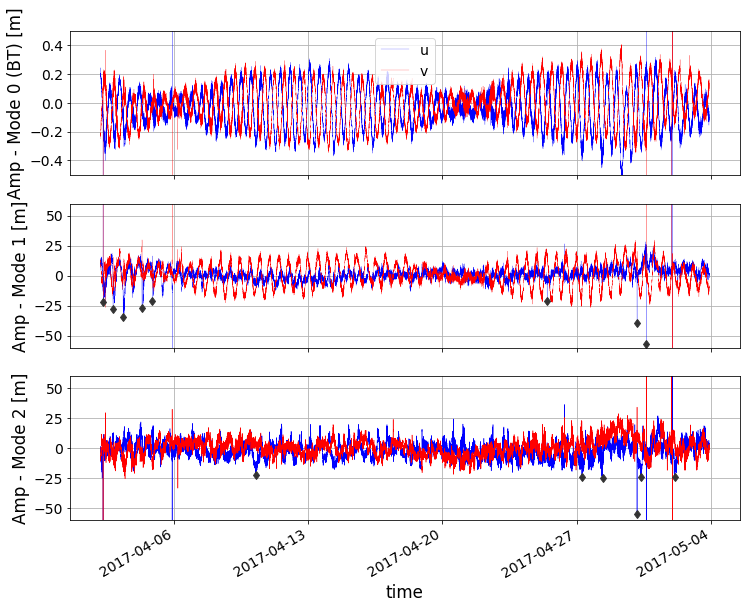

In [3]:
plt.figure(figsize=(12,10))

ds = xray.open_dataset(uvfile, group='SP')
dsb = xray.open_dataset(bfile, group='SP250')

# Clip the buoyancy modes to the same dates as the velocity modes
t1s = pd.to_datetime(str(ds.time.values[0])).strftime('%Y.%m.%d %H:%M:%S')
t2s = pd.to_datetime(str(ds.time.values[-1])).strftime('%Y.%m.%d %H:%M:%S')
dsb = dsb.sel(time=slice(t1s,t2s))
# Flip the velocity depths
ds.z.values[:] = ds.z.values[::-1]

## Find the peak mode-one waves of depression
peaks, tpeakmin, ctr = get_peak_window(ds.Au_n[:,1].values, ds.time.values, 360, 10, fun='min', ctr=0, vals=[], idxs=[])
peak_min = ds.Au_n.sel(time=tpeakmin)[:,1].values

#peaks, tpeakmax, ctr = get_peak_window(ds.A_n[:,0].values, ds.time.values, 360, 5, fun='max', ctr=0, vals=[], idxs=[])
#peak_max = ds.A_n.sel(time=tpeakmax)[:,0].values

# Find the peak mode-two waves of depression
peaks, tpeakmin2, ctr = get_peak_window(ds.Au_n[:,2].values, ds.time.values, 360, 10, fun='min', ctr=0, vals=[], idxs=[])
peak_min2 = ds.Au_n.sel(time=tpeakmin2)[:,2].values

#peaks, tpeakmax2, ctr = get_peak_window(ds.A_n[:,1].values, ds.time.values, 360, 5, fun='max', ctr=0, vals=[], idxs=[])
#peak_max2 = ds.A_n.sel(time=tpeakmax2)[:,1].values



#ds.A_n[:,1].plot(lw=0.6)
# Plot the internal tide signal
ax = plt.subplot(311)
#ds.Autide[:,1].plot(color='b',lw=0.6)
#ds.Avtide[:,1].plot(color='r',lw=0.6)
ds.Au_n[:,0].plot(color='b',lw=0.2)
ds.Av_n[:,0].plot(color='r',lw=0.2)

#ds.uamp[:,1,0].plot(color='r')
#ds.uamp[:,1,1].plot(color='m')
plt.ylim(-0.5,0.5)
plt.grid(b=True)
#plt.ylabel('Amp - harmonic [m]')
plt.ylabel('Amp - Mode 0 (BT) [m]')
plt.legend(('u','v',))

#plt.legend(('Total','M2','M4',))
plt.title('')

# Plot the mode-one amplitude    
plt.subplot(312, sharex=ax)
ds.Au_n[:,1].plot(color='b',lw=0.2)
ds.Av_n[:,1].plot(color='r',lw=0.2)

plt.plot(tpeakmin, peak_min, 'd', color='0.2')
#plt.plot(tpeakmax, peak_max, 'd', color='k')
plt.ylim(-60,60)
plt.grid(b=True)
plt.ylabel('Amp - Mode 1 [m]')
plt.title('')

plt.subplot(313, sharex=ax)
ds.Au_n[:,2].plot(color='b',lw=0.5)
ds.Av_n[:,2].plot(color='r',lw=0.5)

plt.plot(tpeakmin2, peak_min2, 'd', color='0.2')


#plt.plot(tpeakmin2, peak_min2, 'd', color='0.5')
#plt.plot(tpeakmax2, peak_max2, 'd', color='k')

plt.ylim(-60,60)
plt.grid(b=True)
plt.ylabel('Amp - Mode 2 [m]')
plt.title('')


#plt.tight_layout()
plt.show()


# Extract the barotropic tide information

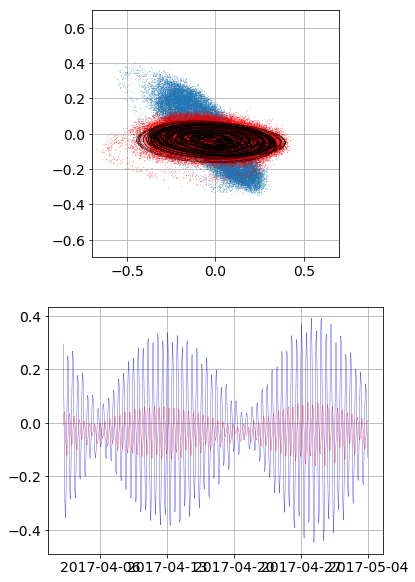

In [4]:
ubar = ds.Au_n[:,0].values
vbar = ds.Av_n[:,0].values

# Rotate along the main axis
tide_angle = -42*np.pi/180.

# Note this is a clockwise rotation matrix
ubar_pr = ubar*np.cos(tide_angle) + vbar*np.sin(tide_angle)
vbar_pr = -ubar*np.sin(tide_angle) + vbar*np.cos(tide_angle)

ubar_pr[np.abs(ubar_pr)>2.] = 0
vbar_pr[np.abs(vbar_pr)>2.] = 0


U = om.OceanMooring(ds.time.values, ubar_pr, 0.)
V = om.OceanMooring(ds.time.values, vbar_pr, 0.)

utide = U.tidefit(['M2','S2','K1','O1','P1','Q1','N2','K2'])
vtide = V.tidefit(['M2','S2','K1','O1','P1','Q1','N2','K2'])

utidefit = utide[-2]
vtidefit = vtide[-2]

plt.figure(figsize=(6,10))
ax=plt.subplot(211)
plt.plot(ubar,vbar,'.', ms=0.2)

plt.plot(ubar_pr,vbar_pr,'r.', ms=0.2)
plt.plot(utidefit, vtidefit,'k.', ms=0.1)


plt.xlim(-0.7,0.7)
plt.ylim(-0.7,0.7)
ax.set_aspect('equal')
plt.grid(b=True)

ax=plt.subplot(212)
plt.plot(ds.time, utidefit,'b', lw=0.3)
plt.plot(ds.time, vtidefit,'r', lw=0.3)
plt.grid(b=True)

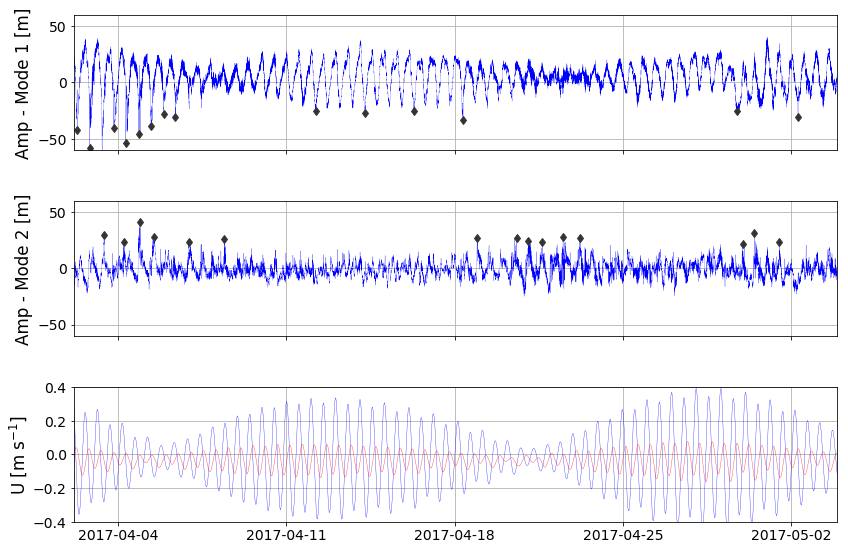

In [5]:
peaks, tpeakmin, ctr = get_peak_window(dsb.A_n[:,0].values, dsb.time.values, 360, 15, fun='min', ctr=0, vals=[], idxs=[])
peak_min = dsb.A_n.sel(time=tpeakmin)[:,0].values

#peaks, tpeakmax, ctr = get_peak_window(ds.A_n[:,0].values, ds.time.values, 360, 5, fun='max', ctr=0, vals=[], idxs=[])
#peak_max = ds.A_n.sel(time=tpeakmax)[:,0].values

# Find the peak mode-two waves of depression
peaks, tpeakmin2, ctr = get_peak_window(dsb.A_n[:,1].values, dsb.time.values, 360, 15, fun='max', ctr=0, vals=[], idxs=[])
peak_min2 = dsb.A_n.sel(time=tpeakmin2)[:,1].values


plt.figure(figsize=(12,8))
# Plot the mode-one amplitude    
plt.subplot(311, sharex=ax)
dsb.A_n[:,0].plot(color='b',lw=0.2)

plt.plot(tpeakmin, peak_min, 'd', color='0.2')
#plt.plot(tpeakmax, peak_max, 'd', color='k')
plt.ylim(-60,60)
plt.grid(b=True)
plt.ylabel('Amp - Mode 1 [m]')
plt.title('')


plt.subplot(312, sharex=ax)
dsb.A_n[:,1].plot(color='b',lw=0.2)

plt.plot(tpeakmin2, peak_min2, 'd', color='0.2')


#plt.plot(tpeakmin2, peak_min2, 'd', color='0.5')
#plt.plot(tpeakmax2, peak_max2, 'd', color='k')

plt.ylim(-60,60)
plt.grid(b=True)
plt.ylabel('Amp - Mode 2 [m]')
plt.title('')


ax=plt.subplot(313,sharex=ax)
plt.plot(ds.time, utidefit,'b', lw=0.3)
plt.plot(ds.time, vtidefit,'r', lw=0.3)
plt.grid(b=True)
plt.ylim(-0.4,0.4)
ax.set_xlim(ds.time.values[0],ds.time.values[-1])

plt.ylabel(r'U [m s$^{-1}$]')
plt.tight_layout()

#plt.savefig('../FIGURES/MaxMode_1_2_buoyancy_SP250.png', dpi=150)
plt.show()


In [6]:
print ds

print dsb

<xarray.Dataset>
Dimensions:   (freqs: 3, modes: 11, time: 45721, timeslow: 120, z: 100)
Coordinates:
  * modes     (modes) int64 0 1 2 3 4 5 6 7 8 9 10
  * time      (time) datetime64[ns] 2017-04-02T04:00:00 2017-04-02T04:01:00 ...
  * z         (z) float64 -250.0 -247.5 -244.9 -242.4 -239.9 -237.4 -234.8 ...
  * freqs     (freqs) float64 0.0001405 0.000281 0.0004216
  * timeslow  (timeslow) datetime64[ns] 2017-04-03T04:00:00 ...
Data variables:
    Autide    (time, modes) float64 0.124 8.487 1.77 -2.187 0.3831 1.966 ...
    wfit      (time, z) float64 -0.001008 -0.0003366 0.0003178 0.0009383 ...
    vamp      (timeslow, modes, freqs) float64 0.165 0.02865 0.03388 5.017 ...
    rhobar    (timeslow, z) float64 1.021e+03 1.021e+03 1.021e+03 1.021e+03 ...
    uphs      (timeslow, modes, freqs) float64 0.5357 2.367 -1.865 0.6724 ...
    N2        (timeslow, z) float64 3.084e-05 3.186e-05 3.401e-05 3.64e-05 ...
    Au_n      (time, modes) float64 0.2064 11.6 -1.712 -1.096 -3.555 -1.674 ...

# Plot the mode one amplitude
```
plt.figure()
plt.subplot(211)
ds.Av_n[:,1].plot(color='b',lw=0.5)
#ds.Au_n[:,1].plot(color='r',lw=0.5)

plt.ylim(-60,60)
plt.grid(b=True)
plt.ylabel('Amp - Mode 1 [m]')
plt.title('')

plt.subplot(212)

#plt.plot(ds.Au_n[:,1].values, ds.Av_n[:,1].values,'.')
plt.axes([-60,60,60,60])
plt.show()
```

# Calculate isotherm strain, $\eta_z$

The strain in each mode, $n$, is:

$$
\frac{\partial \eta_{n}}{\partial z} = A_n(x,t) \frac{\partial \phi_n(z)}{\partial z}
$$

The total strain is:
$$
 \eta_z = \sum_n^{10} A_n(x,t) \frac{\partial \phi_n(z)}{\partial z}
$$

The instantaneous buoyancy frequency is related to isopycnal strain via (*cf*, Sun and Kunze, 1999):

$$
N^2_i(z) = N^2(z)(1+\eta_z)
$$

../FIGURES/IW_ShearStrain_Mode2_type_max_201704230451.png


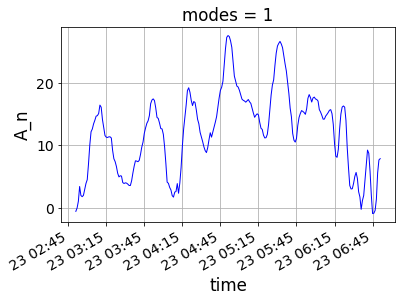

In [7]:
# Clip the wave around the extreme values

## Find the peak mode-one waves of depression
mode = 1
wavefunc = 'max'
wavenum= 5

#####

window=2


peaks, tpeakmin, ctr = get_peak_window(dsb.A_n[:,mode].values, dsb.time.values,\
                360, 15, fun=wavefunc, ctr=0, vals=[], idxs=[])
peak_min = dsb.A_n.sel(time=tpeakmin)[:,mode].values

timewave = tpeakmin[wavenum]

outfile = '../FIGURES/IW_ShearStrain_Mode%d_type_%s_%s.png'%(mode+1, wavefunc, \
        pd.to_datetime(str(timewave)).strftime('%Y%m%d%H%M'))

print outfile



# Extract the time +/- window hours
t1 = timewave - np.timedelta64(window,'h')
t2 = timewave + np.timedelta64(window,'h')

t1s = pd.to_datetime(str(t1)).strftime('%Y.%m.%d %H:%M:%S')
t2s = pd.to_datetime(str(t2)).strftime('%Y.%m.%d %H:%M:%S')

dswave = ds.sel(time=slice(t1s,t2s))
dsbwave = dsb.sel(time=slice(t1s,t2s))


# Select the nearest time to grab phi
phiwave = dsb.phi.sel(timeslow=t1s, method='nearest')
N2wave = dsb.N2.sel(timeslow=t1s, method='nearest')


#dz = phiwave.z[1] - phiwave.z[0]
zmodes = phiwave.z.values[:,np.newaxis]*np.ones_like(phiwave.modes.values)
phi_z = mynp.grad_z(phiwave.values.T, zmodes)

strain_n = dsbwave.A_n.values[:,np.newaxis,:]*phi_z
strain_all = strain_n.sum(axis=-1)

# Calculate the instantaneous N2
N2_i = N2wave.values[np.newaxis,:]*(1. - strain_all)

# Return variables as OceanMooring objects
rho_om = om.OceanMooring(dsbwave.time.values, dsbwave.rhofit.values, dsbwave.z.values)
strain_om = om.OceanMooring(dsbwave.time.values, strain_all, dsbwave.z.values)
N2i_om = om.OceanMooring(dsbwave.time.values, N2_i, dsbwave.z.values)


# Calculate the shear and vertical divergence (strain)
u_om = om.OceanMooring(dswave.time.values, dswave.ufit.values, dswave.z.values)
u_z = om.OceanMooring(dswave.time.values, u_om.grad_z(), dswave.z.values)


v_om = om.OceanMooring(dswave.time.values, dswave.vfit.values, dswave.z.values)
v_z = om.OceanMooring(dswave.time.values, v_om.grad_z(), dswave.z.values)

S2_om = om.OceanMooring(dswave.time.values, v_z.y**2 + u_z.y**2, dswave.z.values)

w_om = om.OceanMooring(dswave.time.values, dswave.wfit.values, dswave.z.values)
w_z = om.OceanMooring(dswave.time.values, w_om.grad_z(), dswave.z.values)


Ri_om = om.OceanMooring(dsbwave.time.values, \
            N2wave.values[np.newaxis,::-1]/S2_om.y.T, dswave.z.values)

# Plot the mode
dsbwave.A_n[:,mode].plot(color='b',lw=1)
plt.grid(b=True)

(736442.11875, 736442.2854166667)

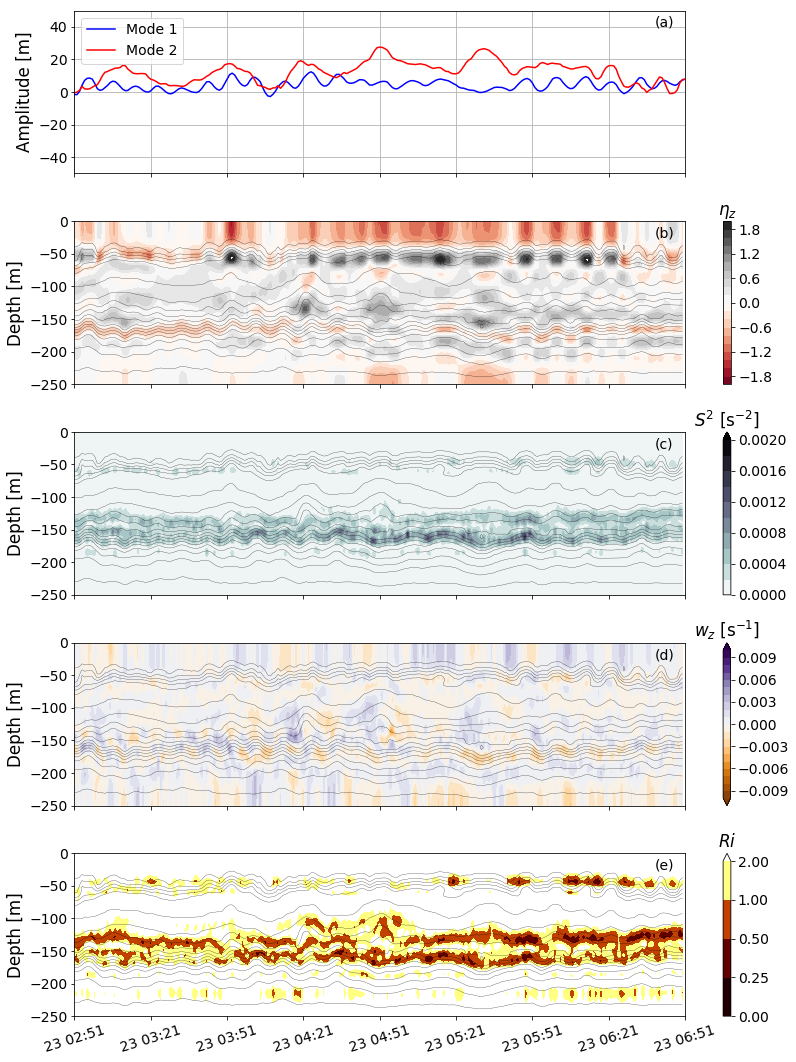

In [9]:
# Contour plot of the wave strain, etc

plt.figure(figsize=(12,15))

ax0 = plt.subplot(511)
dsbwave.A_n[:,0].plot(color='b')
dsbwave.A_n[:,1].plot(color='r')
ax0.set_ylim(-50,50)
plt.grid(b=True)
ax0.set_xticklabels([])
plt.title('')
plt.ylabel('Amplitude [m]')
plt.xlabel('')
plt.legend(('Mode 1','Mode 2'), loc='upper left')

plt.text(0.95,0.9, '(a)', transform=ax0.transAxes)

ax = plt.subplot(512)
#dsbwave.rhofit.T.plot.contour(levels=np.arange(1021,1028,0.25), \
#            colors='k', linewidths=0.25)
C, cb = strain_om.contourf(clevs=np.linspace(-2,2,21),\
        cmap='RdGy', filled=True, cbar=True,)

rho_om.contourf(clevs=np.arange(1020,1028,0.25), filled=False, cbar=False, \
            colors='k', linewidths=0.25)

cb.ax.set_title('$\eta_z$')
ax.set_xticklabels([])
plt.ylabel('Depth [m]')

plt.text(0.95,0.9, '(b)', transform=ax.transAxes)


ax = plt.subplot(513)
C, cb = S2_om.contourf(clevs=np.linspace(0,2e-3,11),\
        cmap='bone_r', filled=True, cbar=True, extend='max')

rho_om.contourf(clevs=np.arange(1020,1028,0.25), filled=False, cbar=False, \
            colors='k', linewidths=0.25)

cb.ax.set_title('$S^2$ [s$^{-2}$]')
ax.set_xticklabels([])
plt.ylabel('Depth [m]')

plt.text(0.95,0.9, '(c)', transform=ax.transAxes)


ax = plt.subplot(514)
C, cb = w_z.contourf(clevs=np.linspace(-1e-2, 1e-2,21),\
        cmap='PuOr', filled=True, cbar=True, extend='both')

rho_om.contourf(clevs=np.arange(1020,1028,0.25), filled=False, cbar=False, \
            colors='k', linewidths=0.25)

cb.ax.set_title('$w_z$ [s$^{-1}$]')
ax.set_xticklabels([])
plt.ylabel('Depth [m]')

plt.text(0.95,0.9, '(d)', transform=ax.transAxes)

ax = plt.subplot(515)

#C, cb = N2i_om.contourf(clevs=np.linspace(0,1e-3,11),\
#        cmap='Blues', filled=True, cbar=True, extend='max')

C, cb = Ri_om.contourf(clevs=[0,0.25,0.5,1.,2.],\
        cmap='afmhot', filled=True, cbar=True, extend='max')

rho_om.contourf(clevs=np.arange(1020,1028,0.25), filled=False, cbar=False, \
            colors='k', linewidths=0.25)

#cb.ax.set_title('$N_i^2$ [s$^{-2}$]')
cb.ax.set_title('$Ri$')
plt.ylabel('Depth [m]')
plt.text(0.95,0.9, '(e)', transform=ax.transAxes)


plt.tight_layout()

pos1 = ax0.get_position()
pos2 = ax.get_position()

ax0.set_position([pos1.x0 , pos1.y0 ,  pos2.width, pos1.height])
ax0.set_xlim(dswave.time.values[0],dswave.time.values[-1])

#plt.savefig(outfile)


/home/suntans/anaconda/envs/suntans/lib/python2.7/site-packages/numpy/core/fromnumeric.py:639: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


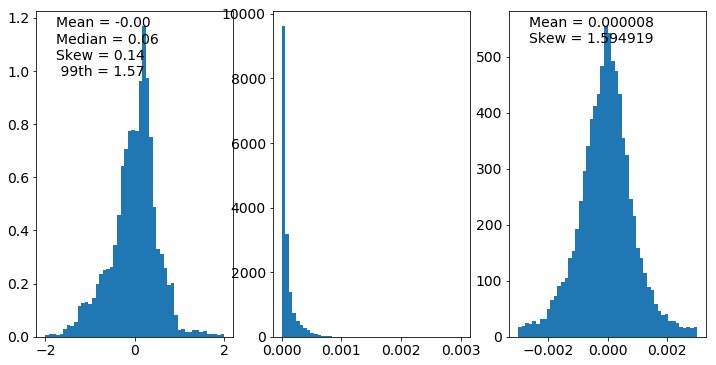

In [20]:
# Plot histograms of shear, strain, and w_z statistics
from scipy import stats

plt.figure(figsize=(12,6))

ax = plt.subplot(131)
plt.hist(strain_om.y.ravel(), bins=np.linspace(-2, 2,51), normed=True)
meanx = np.mean(strain_om.y.ravel())
medx = np.median(strain_om.y.ravel())
p95 = np.percentile(strain_om.y.ravel(),99.)
skewx = stats.skew(strain_om.y.ravel())

plt.text(0.1,0.80,\
        'Mean = %1.2f\nMedian = %1.2f\nSkew = %1.2f\n 99th = %1.2f'%(meanx, medx, skewx, p95),\
         transform=ax.transAxes)

plt.subplot(132)
plt.hist(S2_om.y.ravel(), bins=np.linspace(0, 3e-3,51), normed=True)

ax=plt.subplot(133)
h1=plt.hist(w_z.y.ravel(), bins=np.linspace(-3e-3, 3e-3,51), normed=True)

meanx = np.mean(w_z.y.ravel())
skewx = stats.skew(w_z.y.ravel())

plt.text(0.1,0.9,'Mean = %f\nSkew = %f'%(meanx, skewx), transform=ax.transAxes)

-84.893902952


(736427.2986111111, 736427.5486111111)

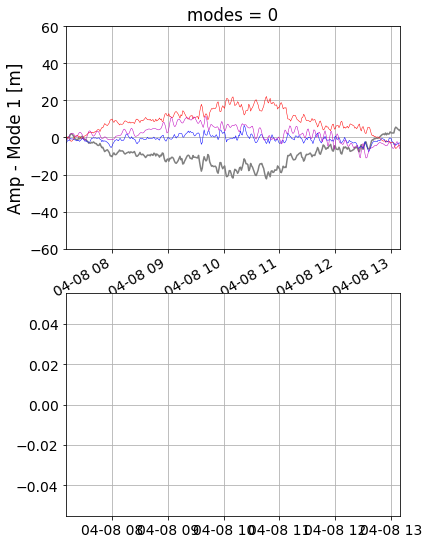

In [691]:
# Calculate the wave direction
#theta = np.arctan2(dswave.Au_n[:,1].values,dswave.Av_n[:,1].values)*180./np.pi

mode = 1

amp = np.abs(dswave.Au_n[:,mode].values + 1j*dswave.Av_n[:,mode].values)
theta = np.angle(dswave.Au_n[:,mode].values + 1j*dswave.Av_n[:,mode].values)


# Find the direction when the amplitude is largest
idx = np.argsort(amp)[::-1]
thetawave = np.mean(theta[idx[0:10]])-np.pi
print thetawave*180./np.pi

# Rotate the velocity to the wave direction
upr_amp = dswave.Au_n[:,mode].values*np.cos(thetawave) + \
    dswave.Av_n[:,mode].values*np.sin(thetawave)

###
plt.figure(figsize=(6,10))
plt.subplot(211)
#plt.plot(dswave.Av_n.time, amp,'k')
plt.plot(dswave.Av_n.time, upr_amp,'0.5')

dswave.Av_n[:,1].plot(color='r',lw=0.5)
dswave.Au_n[:,1].plot(color='b',lw=0.5)
dsbwave.A_n[:,0].plot(color='m',lw=0.5)
plt.grid(b=True)
plt.ylabel('Amp - Mode 1 [m]')
plt.ylim(-60,60)
plt.xlim(t1,t2)


plt.subplot(212)
plt.plot(dswave.Av_n.time[amp>25], theta[amp>25],'k.')
plt.grid(b=True)
plt.xlim(t1,t2)

In [231]:

phiwave

<xarray.DataArray 'phi' (modes: 10, z: 100)>
array([[ 0.      ,  0.030581,  0.061156, ...,  0.063256,  0.031636,  0.      ],
       [-0.      ,  0.054769,  0.109501, ..., -0.101927, -0.051018, -0.      ],
       [-0.      ,  0.060189,  0.120279, ...,  0.166775,  0.083603, -0.      ],
       ..., 
       [-0.      ,  0.143685,  0.285526, ..., -0.381821, -0.19478 , -0.      ],
       [-0.      ,  0.157118,  0.311687, ...,  0.414485,  0.212587, -0.      ],
       [ 0.      ,  0.171164,  0.338899, ..., -0.449086, -0.231732,  0.      ]])
Coordinates:
  * z         (z) float64 0.0 -2.525 -5.051 -7.576 -10.1 -12.63 -15.15 ...
    timeslow  datetime64[ns] 2017-04-03T04:00:00
  * modes     (modes) int64 0 1 2 3 4 5 6 7 8 9
Attributes:
    units:      
    long_name:  Modal structure function